In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
data = pd.read_csv("Airline_Delay_Cause.csv")
data.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0


In [46]:
holiday_months = [7, 8, 11, 12]
data['holiday'] = data['month'].apply(lambda x: 'holiday' if x in holiday_months else 'non_holiday')

top_carriers = ['AS', 'DL', 'AA', 'UA', 'B6', 'WN']
data['carrier_category'] = data['carrier'].apply(lambda x: 'top' if x in top_carriers else 'non_top')

In [47]:
predictors = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_flights']
target = 'arr_del15'

filtered_data = data.dropna(subset=predictors + [target])

X = filtered_data[predictors]
y = (filtered_data[target] > 0).astype(int)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=100,        
    max_depth=10,            
    min_samples_split=10,    
    min_samples_leaf=5,      
    max_features='sqrt',     
    class_weight='balanced'
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [50]:
rf_model.score(X_test, y_test)

1.0

In [51]:
y_pred = rf_model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

Feature Importance:
            feature  importance
0        carrier_ct    0.431043
2            nas_ct    0.251106
4  late_aircraft_ct    0.200808
5       arr_flights    0.067686
1        weather_ct    0.048796
3       security_ct    0.000561


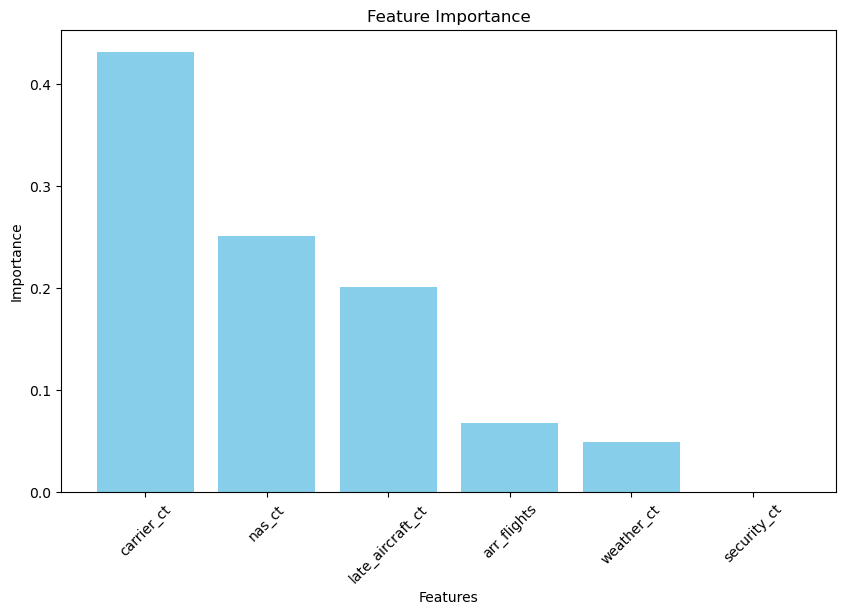

In [52]:
feature_importances = pd.DataFrame({
    'feature': predictors,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=False)
print("Feature Importance:")
print(feature_importances)

plt.figure(figsize=(10, 6))
plt.bar(feature_importances['feature'], feature_importances['importance'], color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

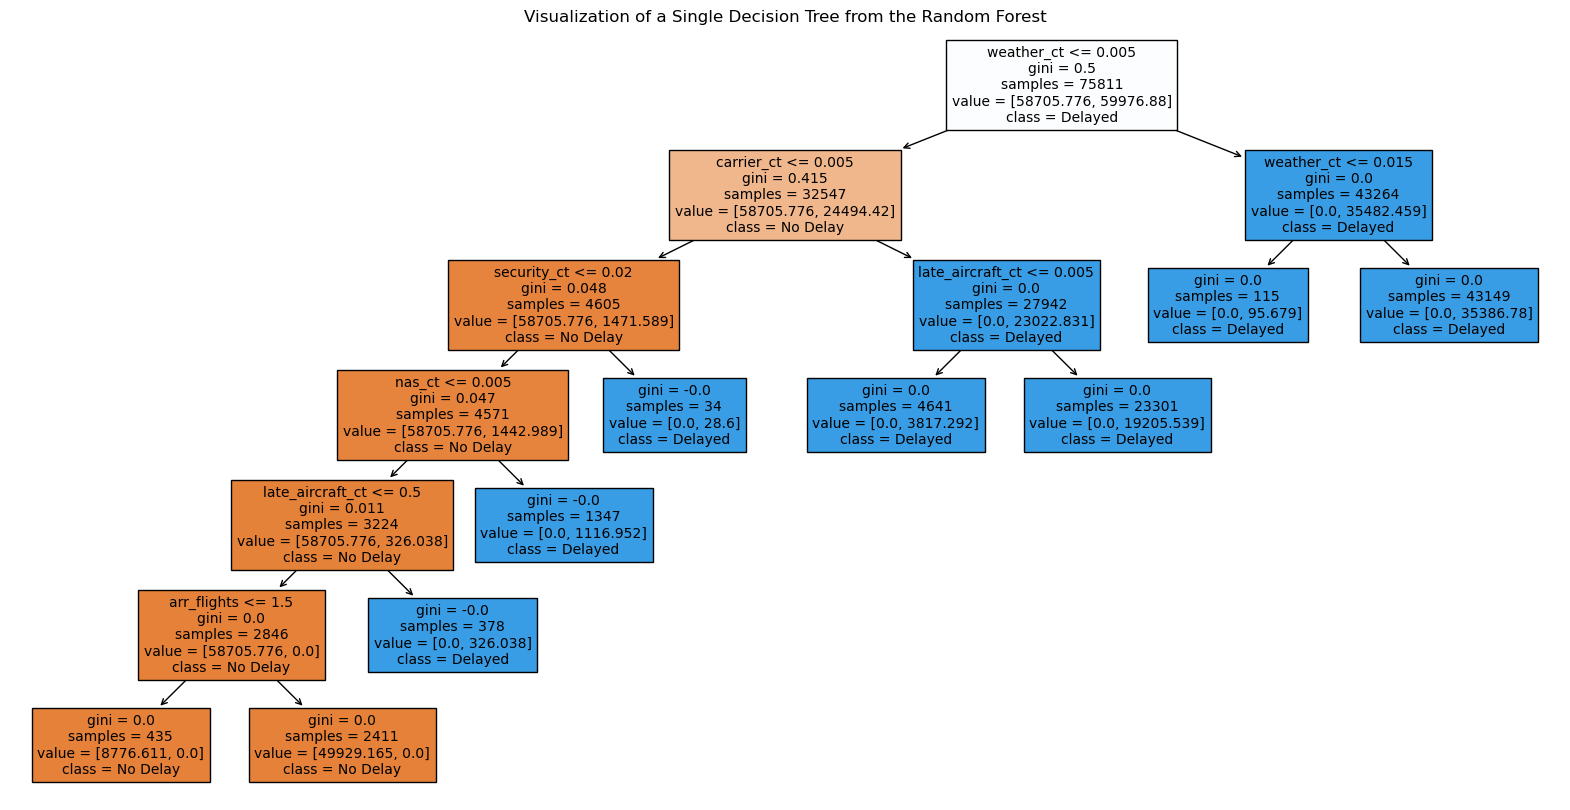

In [53]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(
    rf_model.estimators_[0], 
    feature_names=predictors, 
    class_names=["No Delay", "Delayed"], 
    filled=True, 
    fontsize=10
)
plt.title("Visualization of a Single Decision Tree from the Random Forest")
plt.show()